In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head()

(421570, 5)


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [3]:
stores = pd.read_csv('stores.csv')
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [4]:
train_df = train_df.merge(stores, on='Store')
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0      1     1  2010-02-05      24924.50      False    A  151315
1      1     1  2010-02-12      46039.49       True    A  151315
2      1     1  2010-02-19      41595.55      False    A  151315
3      1     1  2010-02-26      19403.54      False    A  151315
4      1     1  2010-03-05      21827.90      False    A  151315

### Coint Functions

In [5]:
def coint_stores(train_df, dept=90, store_type='A', y_store_id=20):
    train_subset_df = train_df.loc[(train_df['Type']==store_type)&(train_df['Dept']==dept)]
    y = train_subset_df.loc[train_subset_df['Store']==y_store_id, ['Weekly_Sales']].values

    unique_stores = train_subset_df['Store'].unique()
    results = []
    for store_id in unique_stores:
        if store_id == y_store_id:
            continue
        x_store = train_subset_df.loc[train_subset_df['Store']==store_id, ['Date', 'Weekly_Sales']]
        x = x_store['Weekly_Sales'].values
        t_statistic, p_val, critical_p_val = coint(y,x)
        results += [(y_store_id, store_id, t_statistic, p_val, critical_p_val)]
    results_df = pd.DataFrame(results, columns=["y_store_id", "store_id", "t_statistic", "p_val", "critical_p_val"])
    results_df = results_df.sort_values("p_val").reset_index(drop=True)
    
    return results_df

In [6]:
def plot_pairs_coint(train_df, coint_results, dept=90, store_type='A'):
    train_subset_df = train_df.loc[(train_df['Type']==store_type)&(train_df['Dept']==dept)]
    
    for index, row in coint_results.iterrows():
        y_store_id, x_store_id, t_stat, p_val = row['y_store_id'], row['store_id'], row['t_statistic'], row['p_val']
        y = train_subset_df.loc[train_subset_df['Store']==y_store_id, ['Weekly_Sales']].values
        x = train_subset_df.loc[train_subset_df['Store']==x_store_id, ['Weekly_Sales']].values
        
        plt.plot(y)
        plt.plot(x)
        plt.title(f'Store - y: {y_store_id}, Store - x: {x_store_id}, p-val: {np.round(p_val,3)}, t-statistic: {np.round(t_stat,3)}')
        plt.show()

### Subsetting based on Dept, Store Type, and Store id and Plotting the graphs

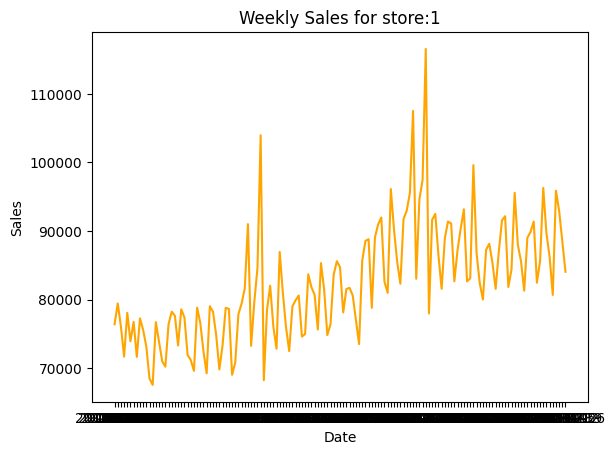

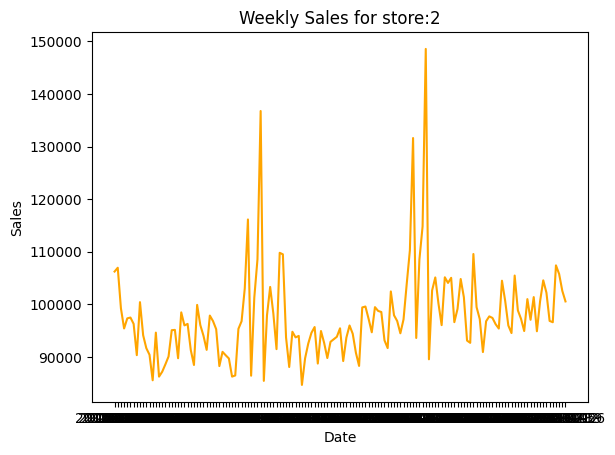

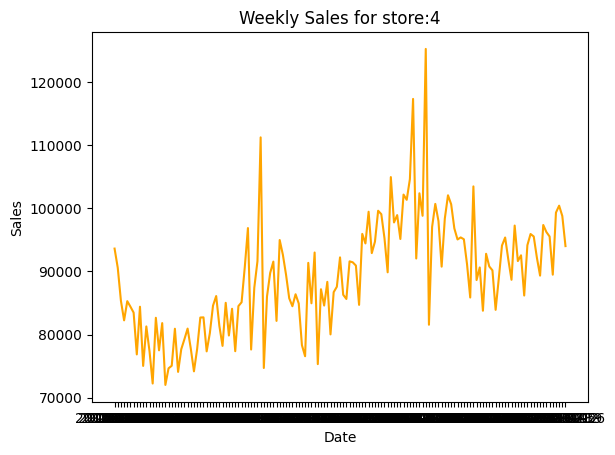

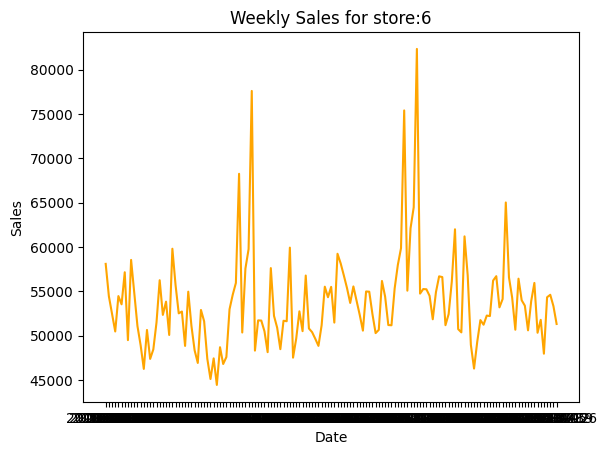

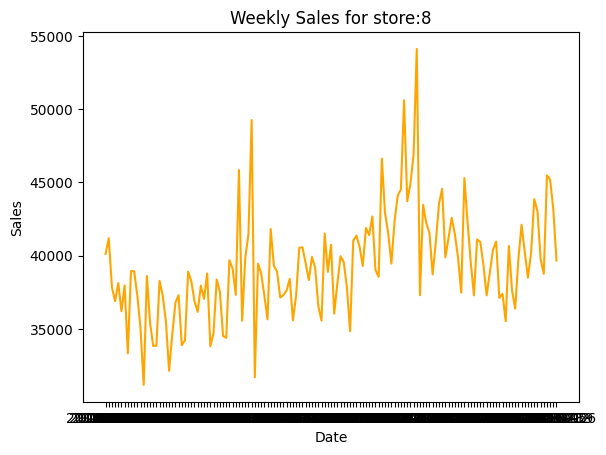

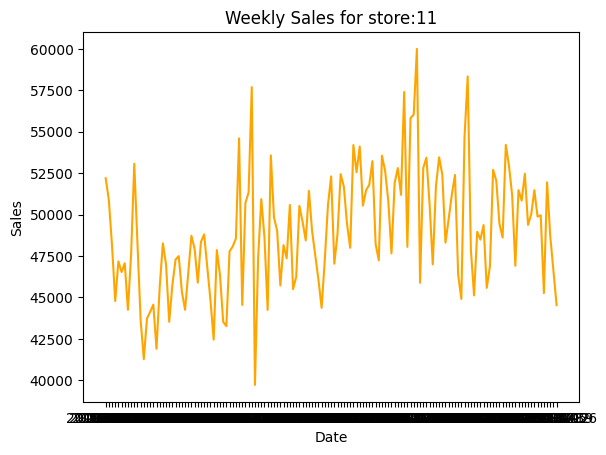

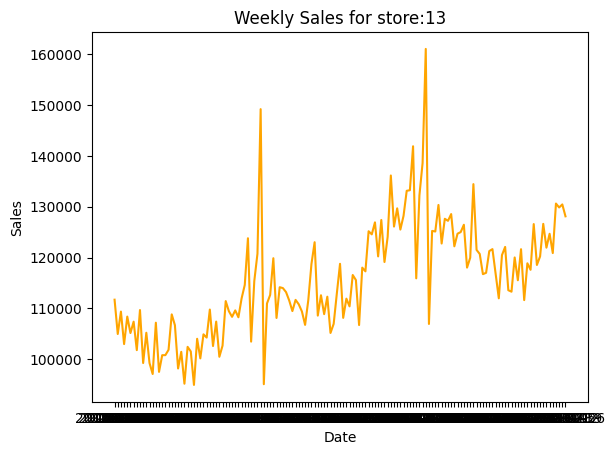

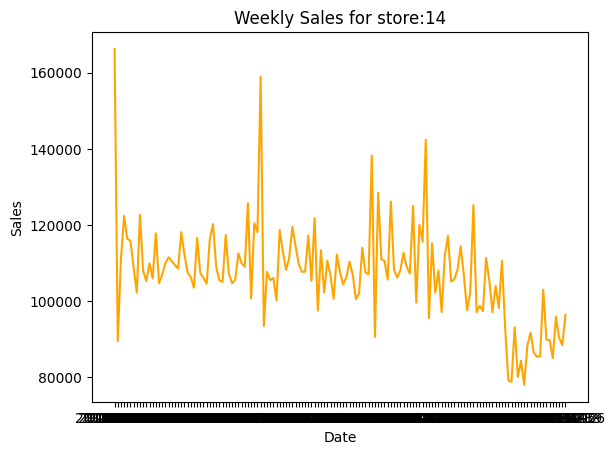

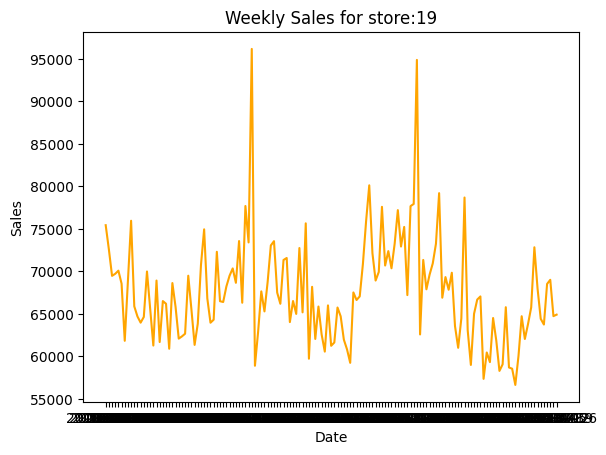

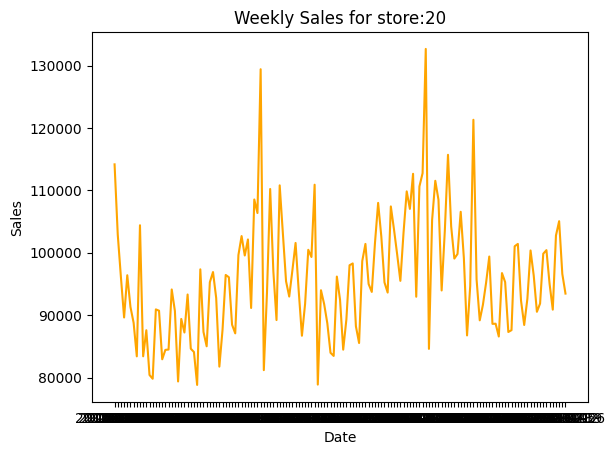

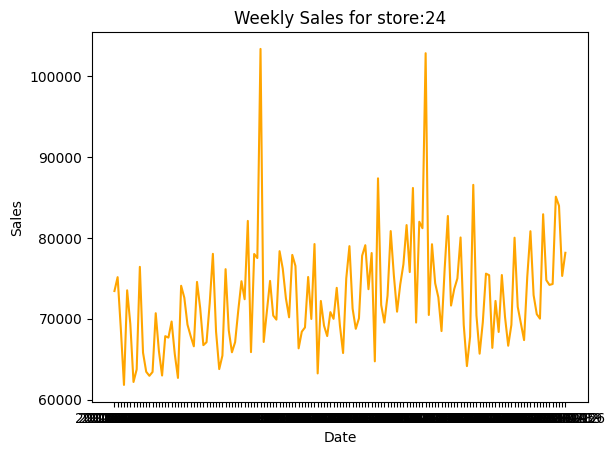

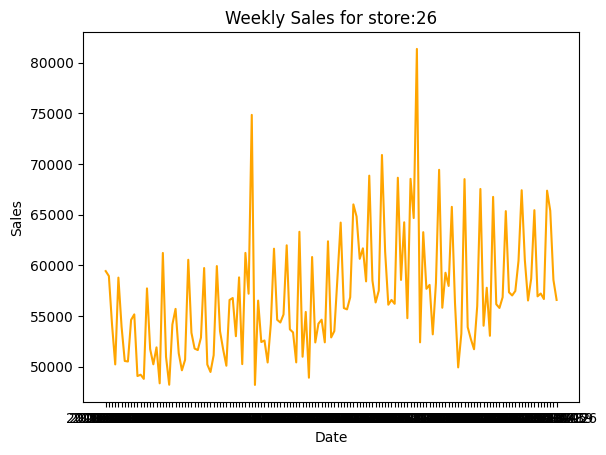

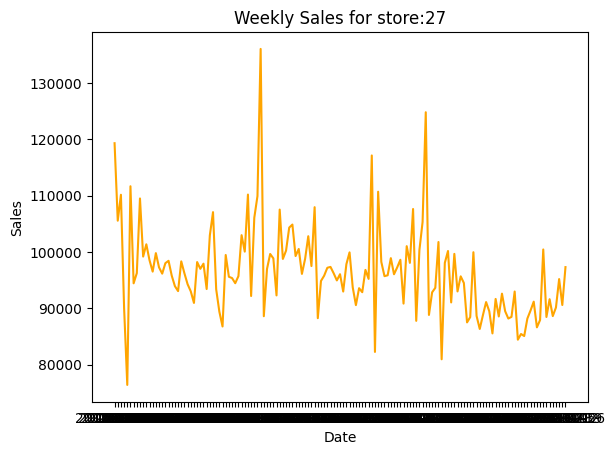

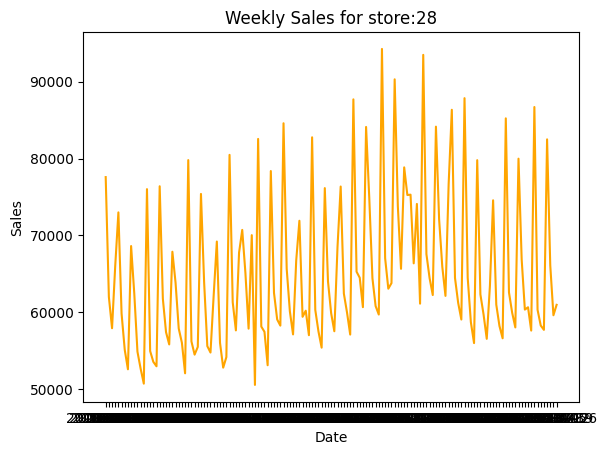

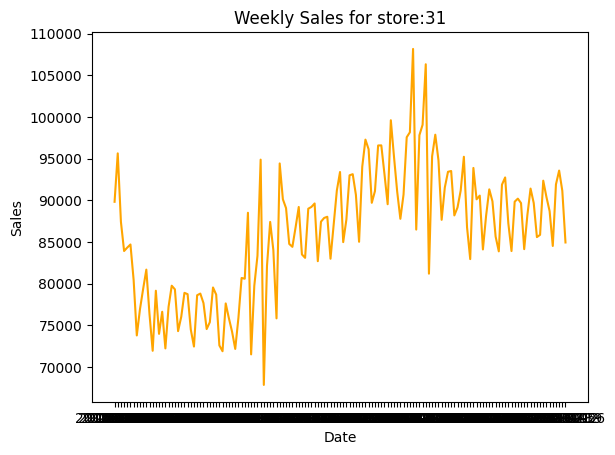

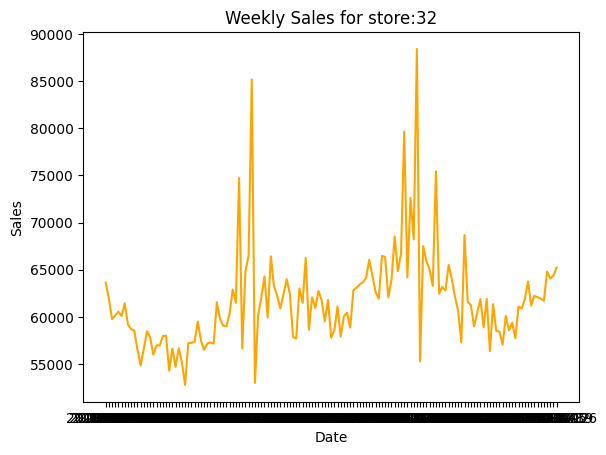

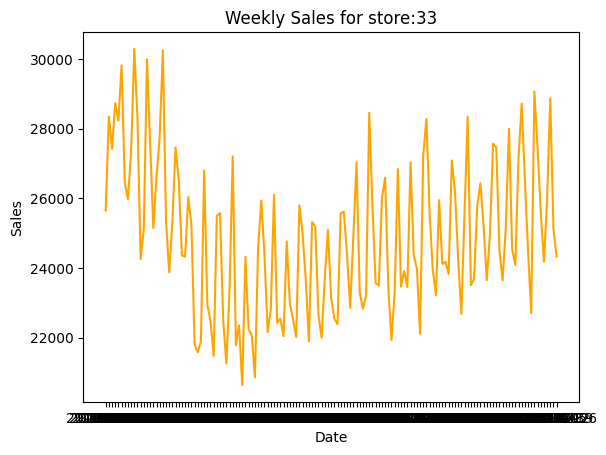

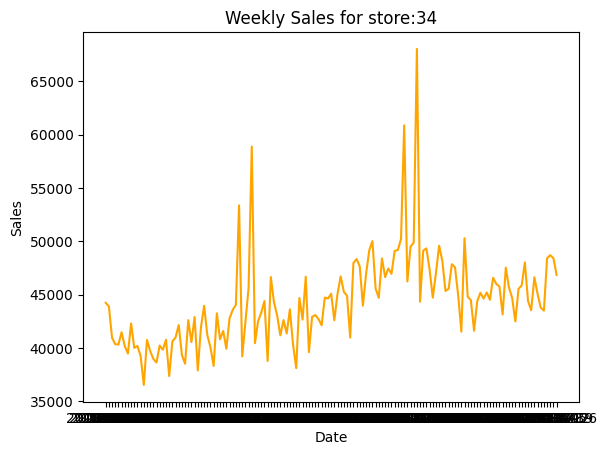

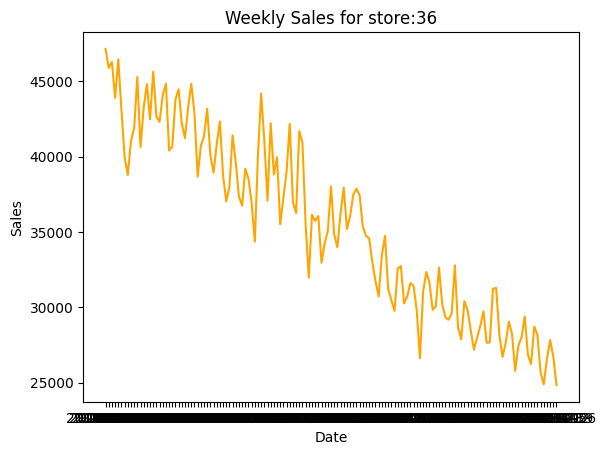

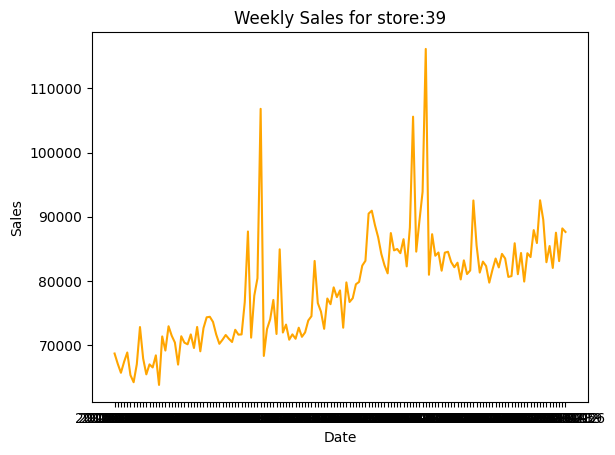

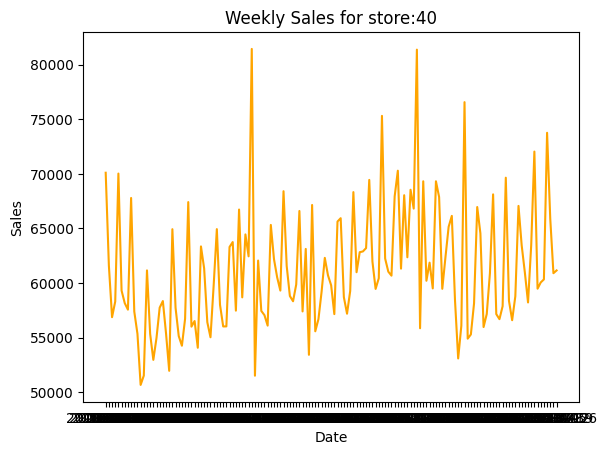

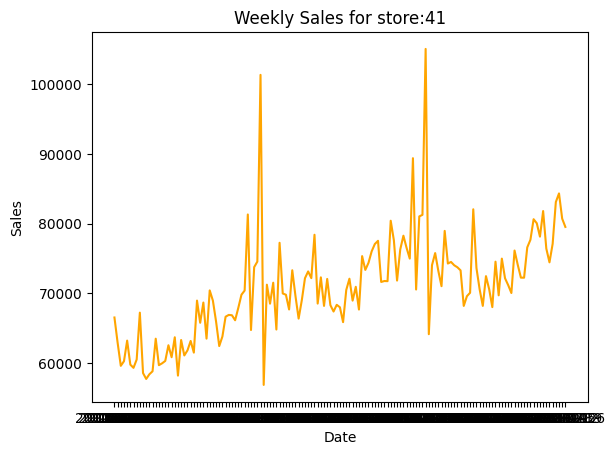

In [7]:
dept = 90
store_type= 'A'
train_subset_df = train_df.loc[(train_df['Type']==store_type)&(train_df['Dept']==dept)]
unique_stores = train_subset_df['Store'].unique()
for store_id in unique_stores:
    store_df = train_subset_df.loc[train_subset_df['Store']==store_id, ['Date', 'Weekly_Sales']]
    plt.plot(store_df['Date'], store_df['Weekly_Sales'], linestyle='-', color='orange')
    plt.title(f'Weekly Sales for store:{store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

### Subsetting based on Dept, Store Type, and Store id 

### Example 1 - Good cointegrated pairs

In [8]:
dept = 90
store_type= 'A'
y_store_id=2

In [9]:
coint_results = coint_stores(train_df, dept, store_type, y_store_id)

In [10]:
coint_results

y_store_id  store_id  t_statistic     p_val  \
0            2        24    -3.780691  0.014381   
1            2        40    -3.752772  0.015651   
2            2         6    -3.607645  0.023973   
3            2        32    -3.483569  0.033880   
4            2        20    -3.468263  0.035314   
5            2        39    -3.425591  0.039587   
6            2        13    -3.315192  0.052682   
7            2        36    -3.227416  0.065461   
8            2        41    -3.177556  0.073762   
9            2         8    -3.167698  0.075498   
10           2        26    -3.136307  0.081241   
11           2        34    -3.054940  0.097716   
12           2         1    -3.033690  0.102413   
13           2        28    -2.994247  0.111579   
14           2        11    -2.951226  0.122259   
15           2         4    -2.908451  0.133601   
16           2        33    -2.719772  0.192548   
17           2        31    -2.591972  0.240078   
18           2        19    -2.522834  0.269093   
19           2        27    -2.124549  0.463543   
20           2        14    -1.927764  0.565862   

                                       critical_p_val  
0   [-3.975228772069034, -3.379497248561793, -3.07...  
1   [-3.975228772069034, -3.379497248561793, -3.07...  
2   [-3.975228772069034, -3.379497248561793, -3.07...  
3   [-3.975228772069034, -3.379497248561793, -3.07...  
4   [-3.975228772069034, -3.379497248561793, -3.07...  
5   [-3.975228772069034, -3.379497248561793, -3.07...  
6   [-3.975228772069034, -3.379497248561793, -3.07...  
7   [-3.975228772069034, -3.379497248561793, -3.07...  
8   [-3.975228772069034, -3.379497248561793, -3.07...  
9   [-3.975228772069034, -3.379497248561793, -3.07...  
10  [-3.975228772069034, -3.379497248561793, -3.07...  
11  [-3.975228772069034, -3.379497248561793, -3.07...  
12  [-3.975228772069034, -3.379497248561793, -3.07...  
13  [-3.975228772069034, -3.379497248561793, -3.07...  
14  [-3.975228772069034, -3.379497248561793, -3.07...  
15  [-3.975228772069034, -3.379497248561793, -3.07...  
16  [-3.975228772069034, -3.379497248561793, -3.07...  
17  [-3.975228772069034, -3.379497248561793, -3.07...  
18  [-3.975228772069034, -3.379497248561793, -3.07...  
19  [-3.975228772069034, -3.379497248561793, -3.07...  
20  [-3.975228772069034, -3.379497248561793, -3.07...

In [11]:
pd.concat([coint_results.head(3), coint_results.tail(3)])

y_store_id  store_id  t_statistic     p_val  \
0            2        24    -3.780691  0.014381   
1            2        40    -3.752772  0.015651   
2            2         6    -3.607645  0.023973   
18           2        19    -2.522834  0.269093   
19           2        27    -2.124549  0.463543   
20           2        14    -1.927764  0.565862   

                                       critical_p_val  
0   [-3.975228772069034, -3.379497248561793, -3.07...  
1   [-3.975228772069034, -3.379497248561793, -3.07...  
2   [-3.975228772069034, -3.379497248561793, -3.07...  
18  [-3.975228772069034, -3.379497248561793, -3.07...  
19  [-3.975228772069034, -3.379497248561793, -3.07...  
20  [-3.975228772069034, -3.379497248561793, -3.07...

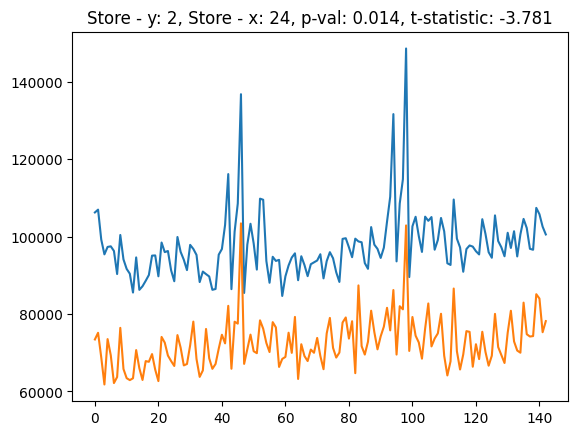

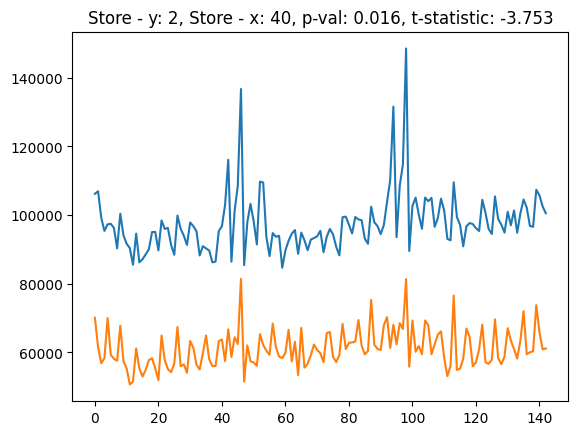

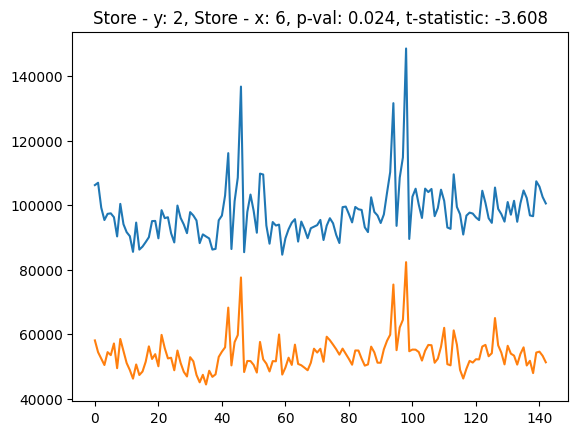

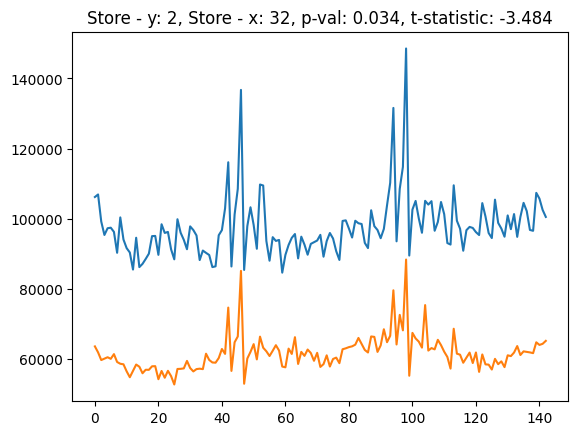

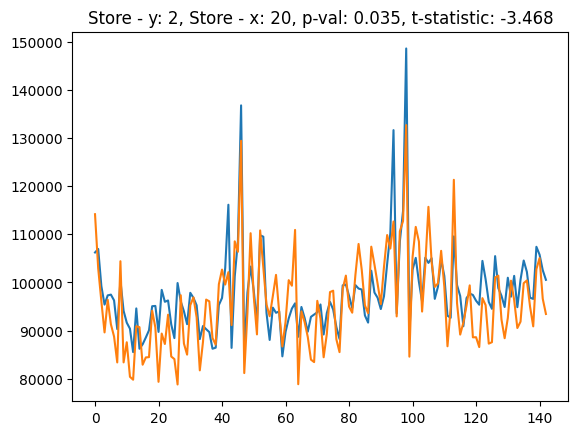

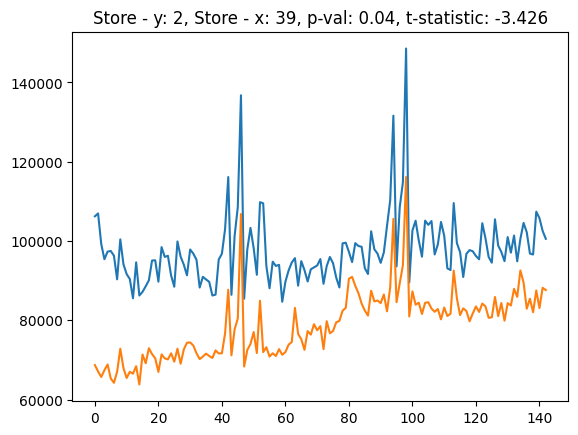

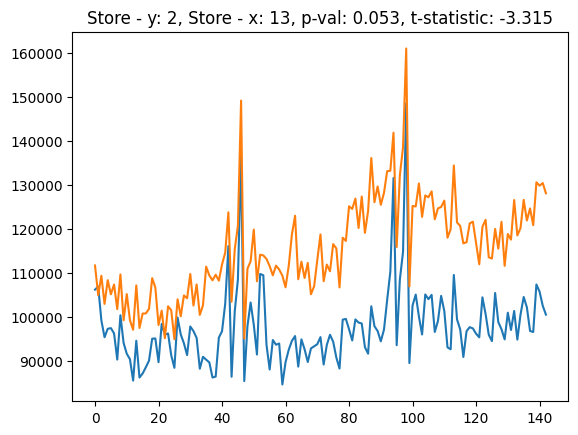

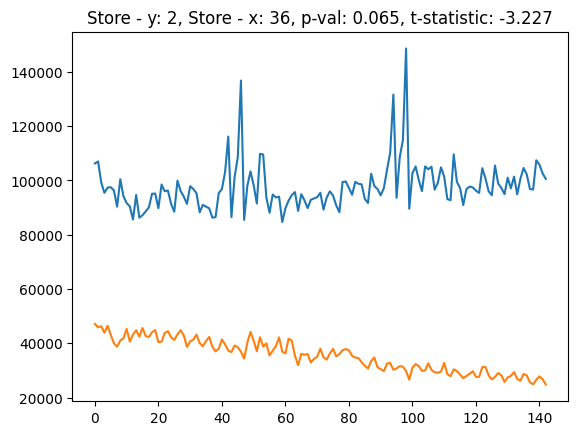

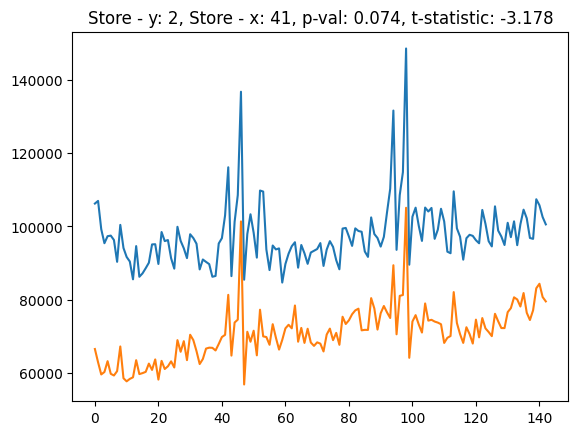

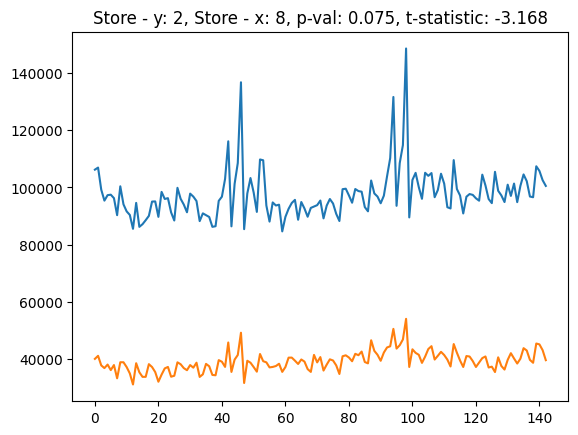

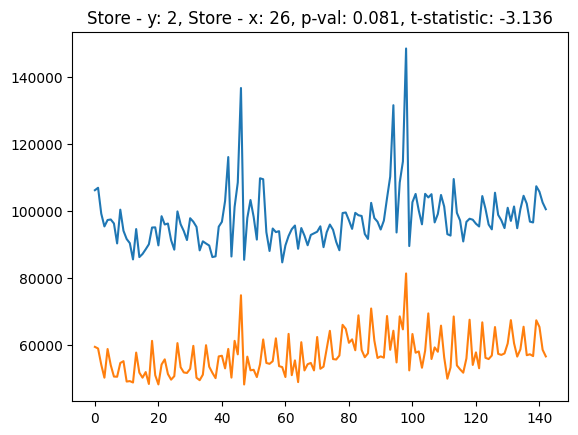

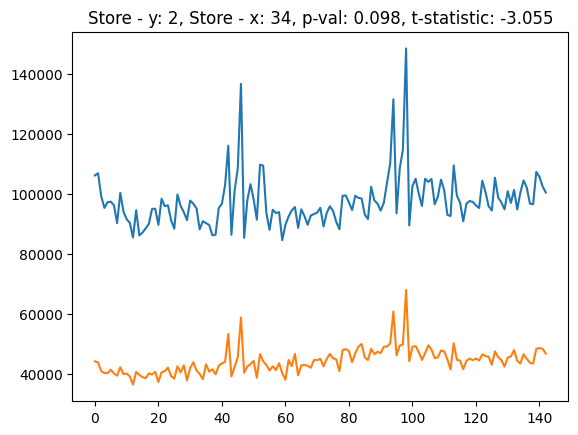

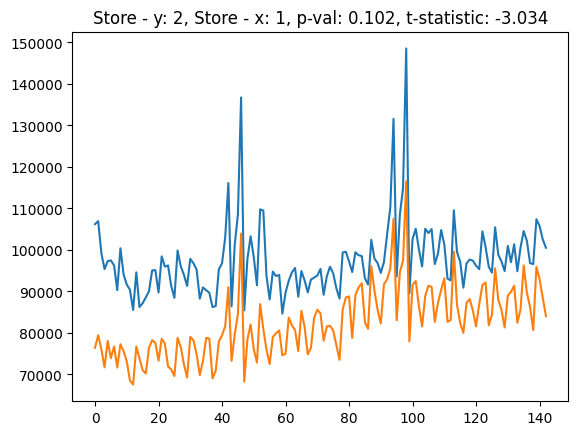

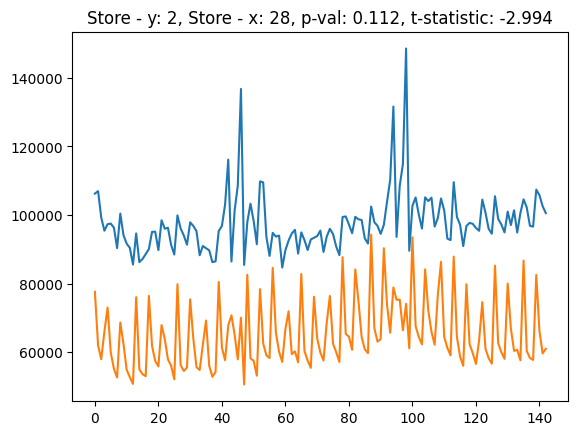

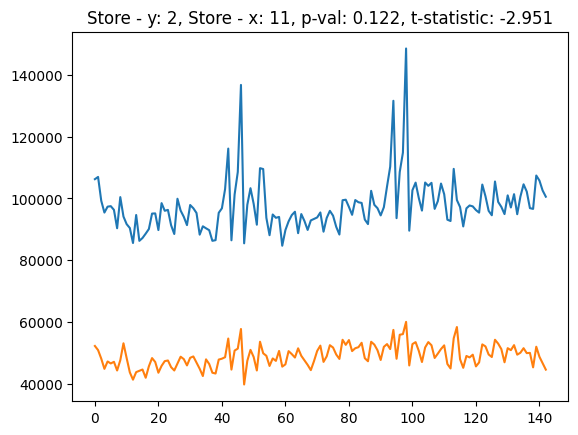

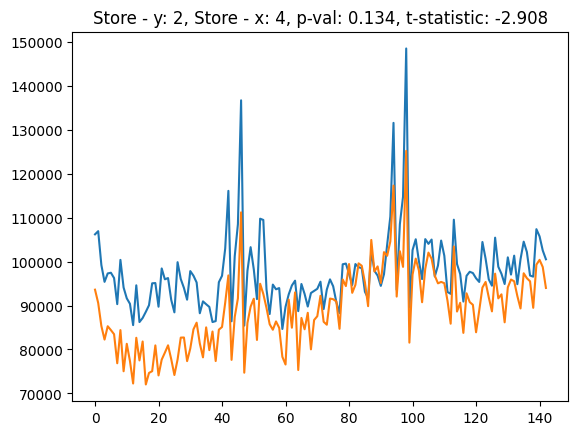

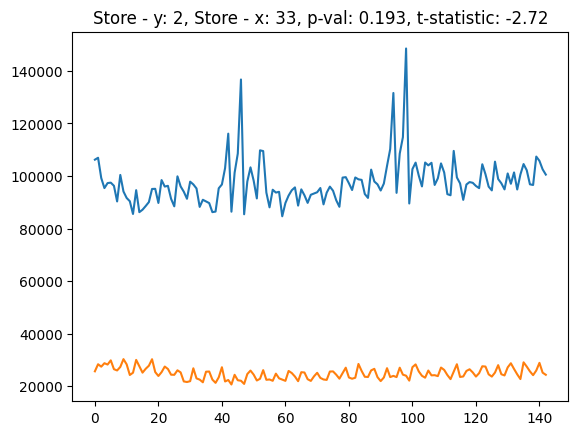

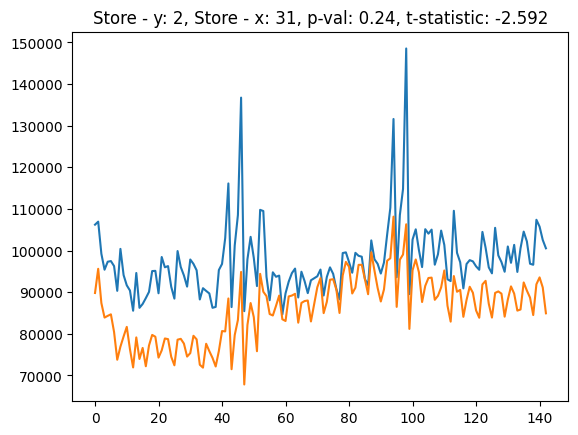

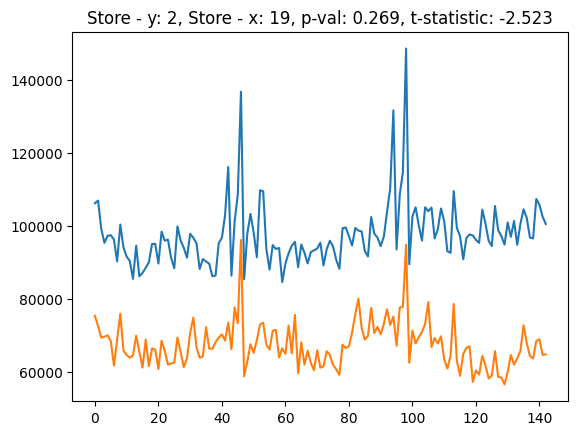

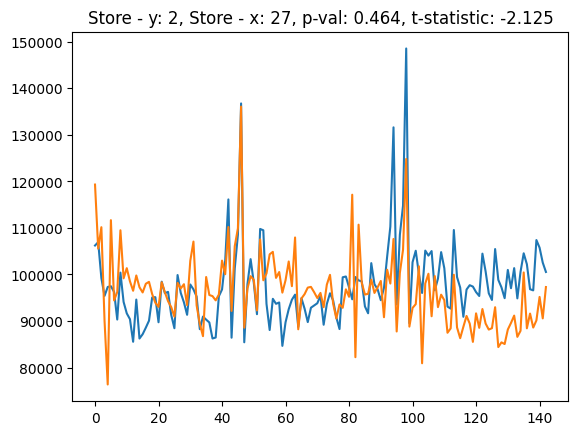

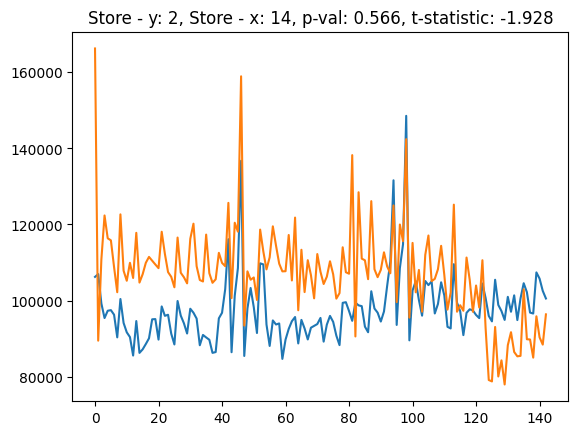

In [12]:
plot_pairs_coint(train_df, coint_results, dept=dept, store_type=store_type)

### Example 2 -  Pairs with good cointegration

In [13]:
dept=95
store_type= 'A'
y_store_id=1

In [14]:
coint_results = coint_stores(train_df, dept, store_type, y_store_id)
coint_results

y_store_id  store_id  t_statistic     p_val  \
0            1        13    -4.407901  0.001728   
1            1        41    -3.864421  0.011099   
2            1        11    -3.630111  0.022476   
3            1        26    -3.201795  0.069628   
4            1         8    -3.077897  0.092829   
5            1        33    -2.985152  0.113777   
6            1        39    -2.904985  0.134552   
7            1        40    -2.685148  0.204966   
8            1        32    -2.501122  0.278574   
9            1         2    -2.450789  0.301193   
10           1        24    -2.328128  0.359604   
11           1         6    -2.312451  0.367356   
12           1        20    -2.147763  0.451441   
13           1        34    -2.046825  0.504168   
14           1        28    -1.987096  0.535279   
15           1        14    -1.979535  0.539198   
16           1        31    -1.878171  0.591036   
17           1         4    -1.847843  0.606206   
18           1        19    -1.728087  0.663950   
19           1        27    -1.672277  0.689444   
20           1        36    -1.532889  0.748366   

                                       critical_p_val  
0   [-3.975228772069034, -3.379497248561793, -3.07...  
1   [-3.975228772069034, -3.379497248561793, -3.07...  
2   [-3.975228772069034, -3.379497248561793, -3.07...  
3   [-3.975228772069034, -3.379497248561793, -3.07...  
4   [-3.975228772069034, -3.379497248561793, -3.07...  
5   [-3.975228772069034, -3.379497248561793, -3.07...  
6   [-3.975228772069034, -3.379497248561793, -3.07...  
7   [-3.975228772069034, -3.379497248561793, -3.07...  
8   [-3.975228772069034, -3.379497248561793, -3.07...  
9   [-3.975228772069034, -3.379497248561793, -3.07...  
10  [-3.975228772069034, -3.379497248561793, -3.07...  
11  [-3.975228772069034, -3.379497248561793, -3.07...  
12  [-3.975228772069034, -3.379497248561793, -3.07...  
13  [-3.975228772069034, -3.379497248561793, -3.07...  
14  [-3.975228772069034, -3.379497248561793, -3.07...  
15  [-3.975228772069034, -3.379497248561793, -3.07...  
16  [-3.975228772069034, -3.379497248561793, -3.07...  
17  [-3.975228772069034, -3.379497248561793, -3.07...  
18  [-3.975228772069034, -3.379497248561793, -3.07...  
19  [-3.975228772069034, -3.379497248561793, -3.07...  
20  [-3.975228772069034, -3.379497248561793, -3.07...

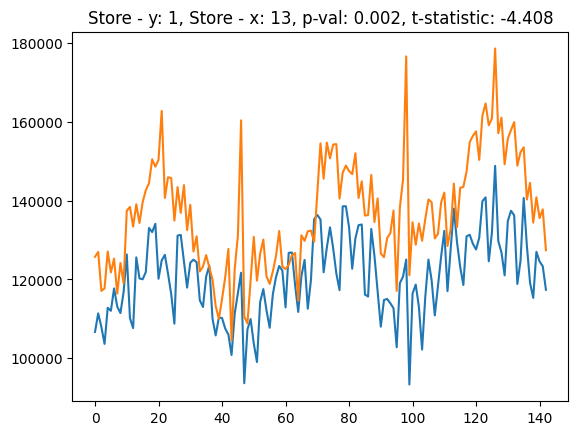

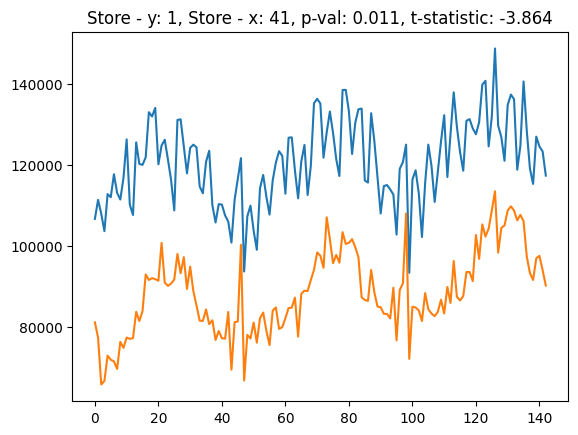

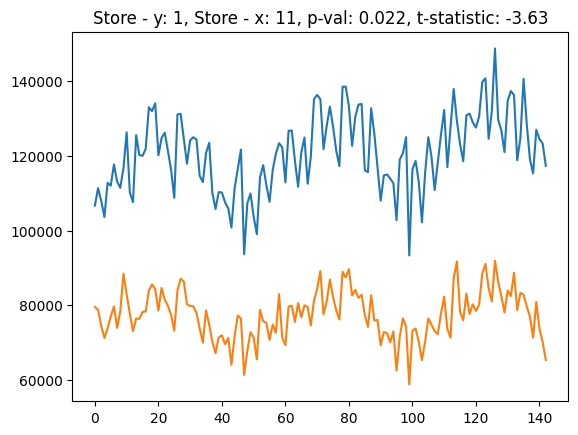

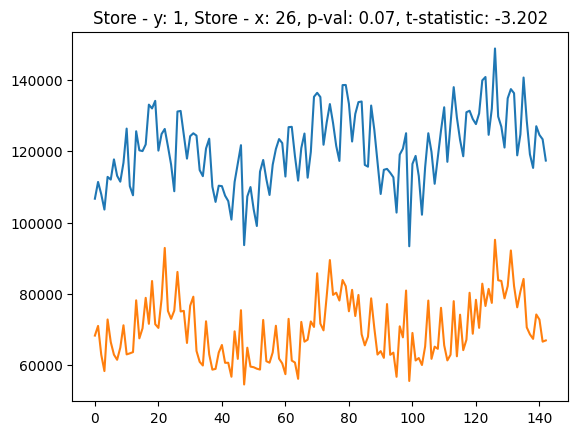

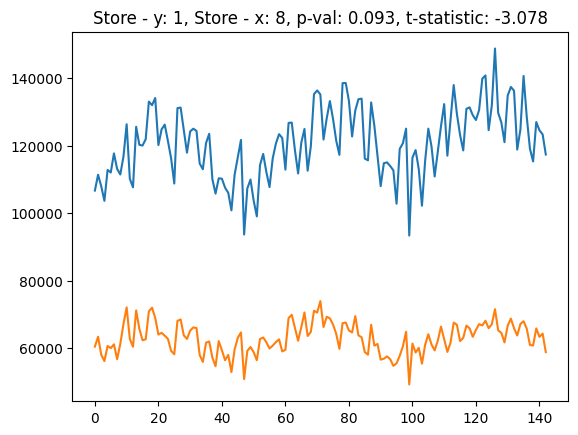

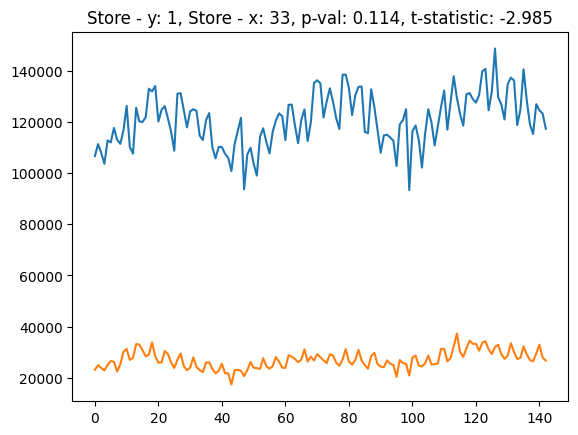

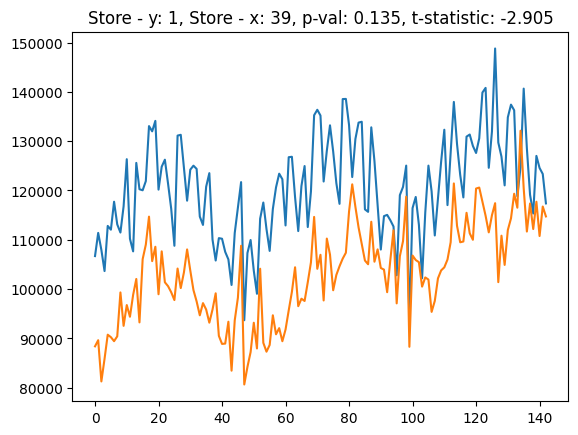

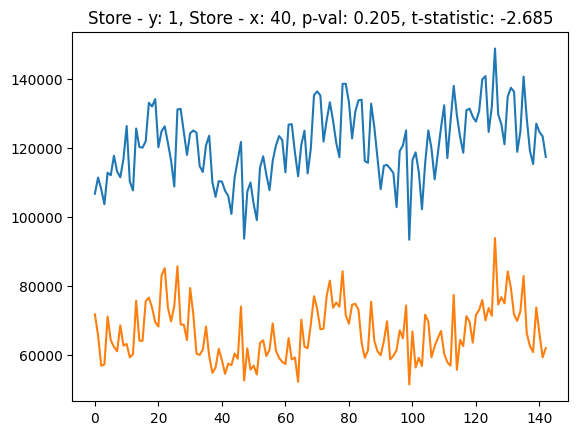

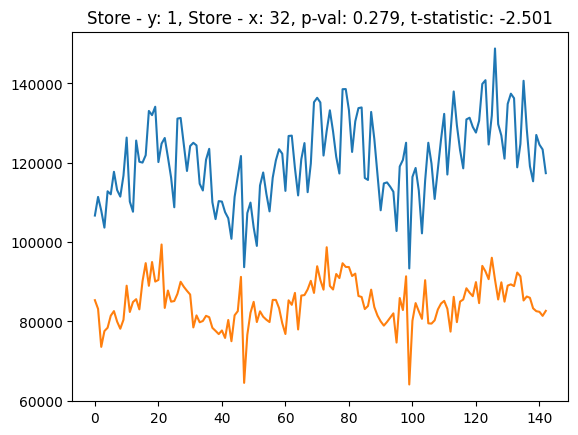

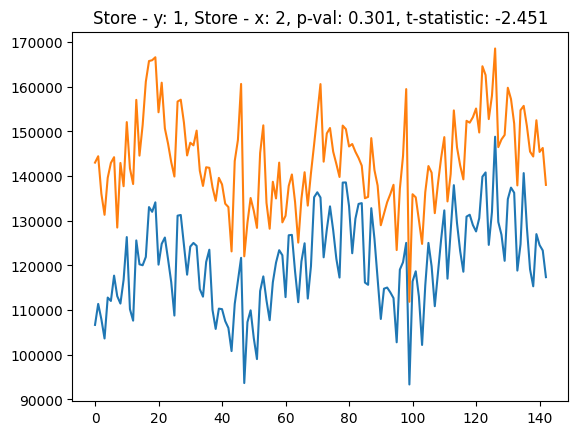

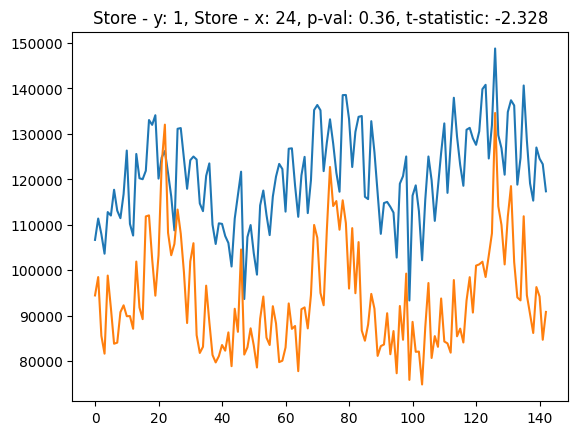

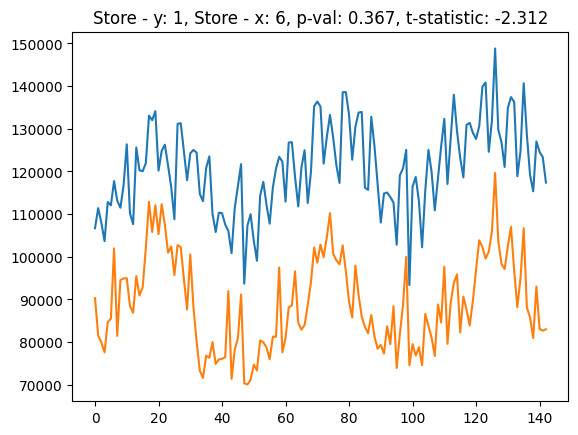

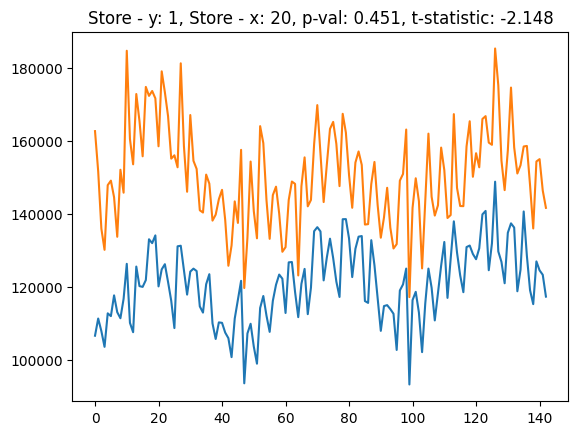

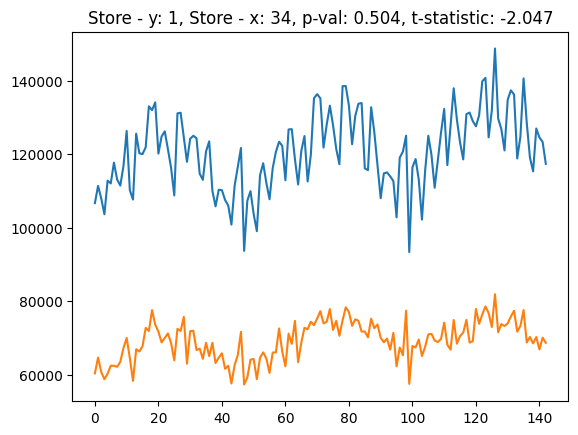

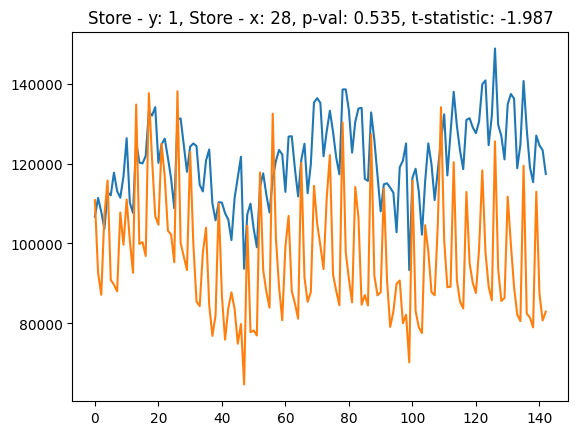

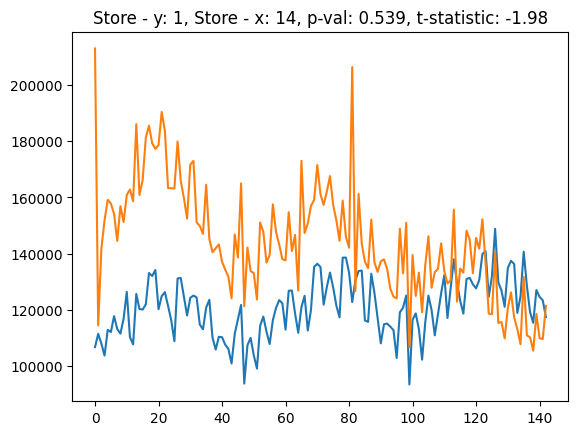

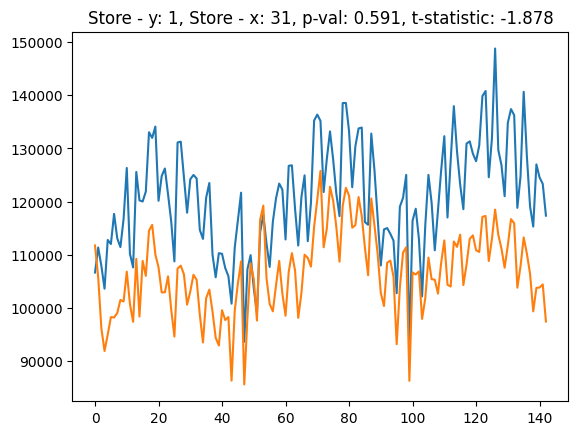

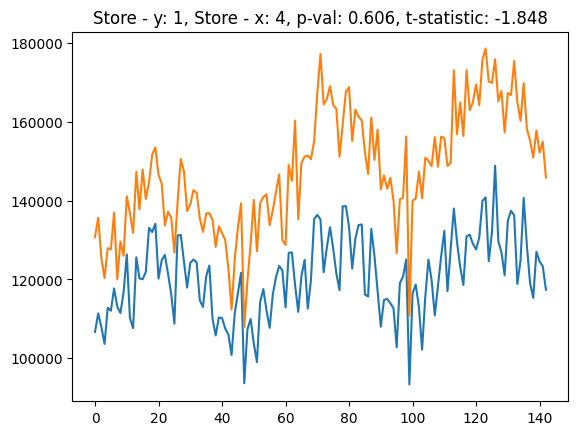

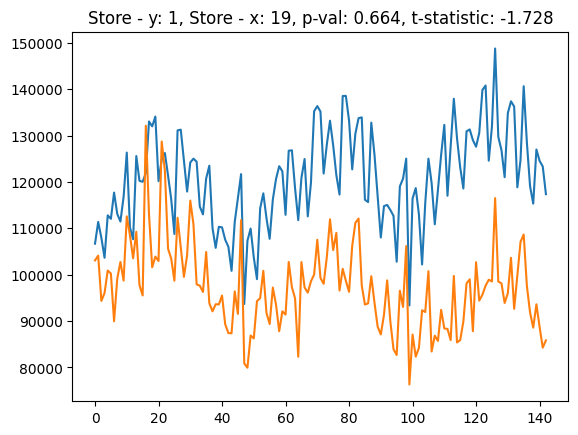

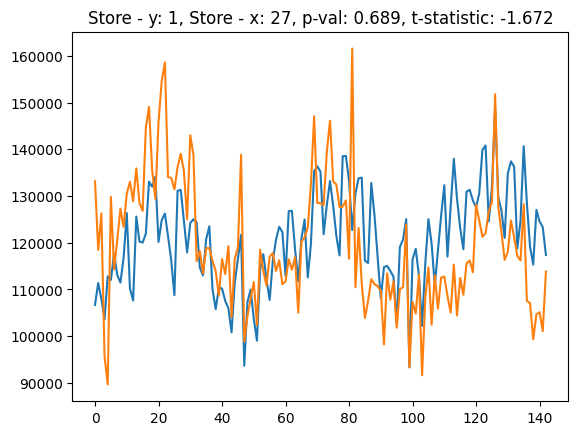

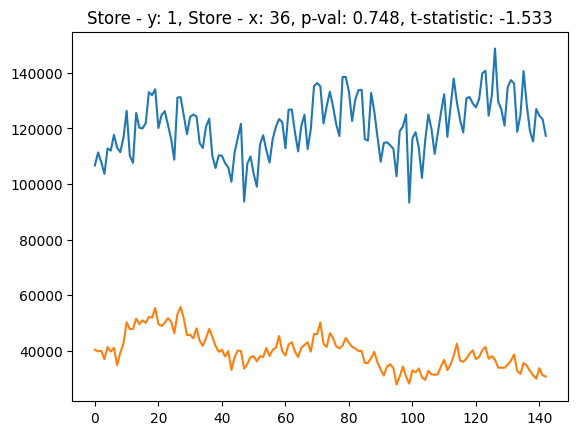

In [15]:
plot_pairs_coint(train_df, coint_results, dept=dept, store_type=store_type)

### Example 3 -  Pairs with poor cointegration

In [16]:
dept=95
store_type= 'A'
y_store_id=14

In [17]:
coint_results = coint_stores(train_df, dept, store_type, y_store_id)
coint_results

y_store_id  store_id  t_statistic     p_val  \
0           14        24    -1.475977  0.770288   
1           14        19    -1.455684  0.777791   
2           14        39    -1.426121  0.788420   
3           14        32    -1.298580  0.830164   
4           14         4    -1.294941  0.831257   
5           14        27    -1.262948  0.840638   
6           14        20    -1.182839  0.862337   
7           14        40    -1.060451  0.890769   
8           14         2    -1.047826  0.893395   
9           14        11    -0.974382  0.907599   
10          14        26    -0.946187  0.912587   
11          14        36    -0.941455  0.913400   
12          14         6    -0.883701  0.922780   
13          14        41    -0.781733  0.937062   
14          14        33    -0.743941  0.941683   
15          14        31    -0.735953  0.942616   
16          14        28    -0.677967  0.948964   
17          14        34    -0.664292  0.950356   
18          14        13    -0.651635  0.951610   
19          14         8    -0.599739  0.956424   
20          14         1    -0.571450  0.958838   

                                       critical_p_val  
0   [-3.975228772069034, -3.379497248561793, -3.07...  
1   [-3.975228772069034, -3.379497248561793, -3.07...  
2   [-3.975228772069034, -3.379497248561793, -3.07...  
3   [-3.975228772069034, -3.379497248561793, -3.07...  
4   [-3.975228772069034, -3.379497248561793, -3.07...  
5   [-3.975228772069034, -3.379497248561793, -3.07...  
6   [-3.975228772069034, -3.379497248561793, -3.07...  
7   [-3.975228772069034, -3.379497248561793, -3.07...  
8   [-3.975228772069034, -3.379497248561793, -3.07...  
9   [-3.975228772069034, -3.379497248561793, -3.07...  
10  [-3.975228772069034, -3.379497248561793, -3.07...  
11  [-3.975228772069034, -3.379497248561793, -3.07...  
12  [-3.975228772069034, -3.379497248561793, -3.07...  
13  [-3.975228772069034, -3.379497248561793, -3.07...  
14  [-3.975228772069034, -3.379497248561793, -3.07...  
15  [-3.975228772069034, -3.379497248561793, -3.07...  
16  [-3.975228772069034, -3.379497248561793, -3.07...  
17  [-3.975228772069034, -3.379497248561793, -3.07...  
18  [-3.975228772069034, -3.379497248561793, -3.07...  
19  [-3.975228772069034, -3.379497248561793, -3.07...  
20  [-3.975228772069034, -3.379497248561793, -3.07...

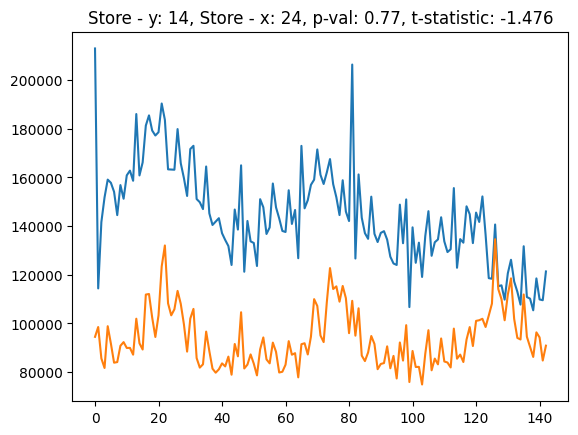

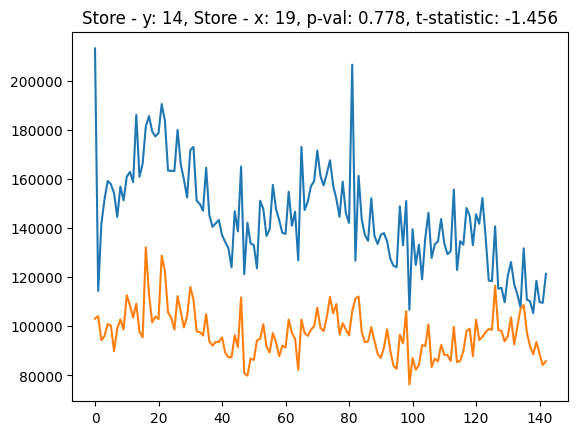

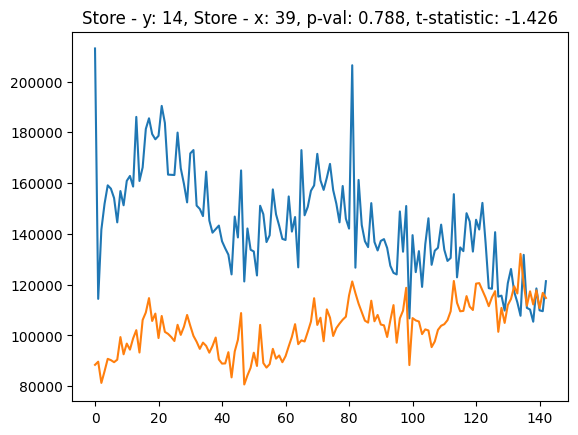

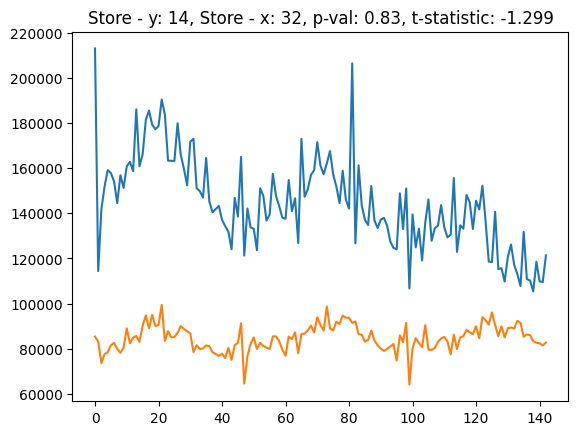

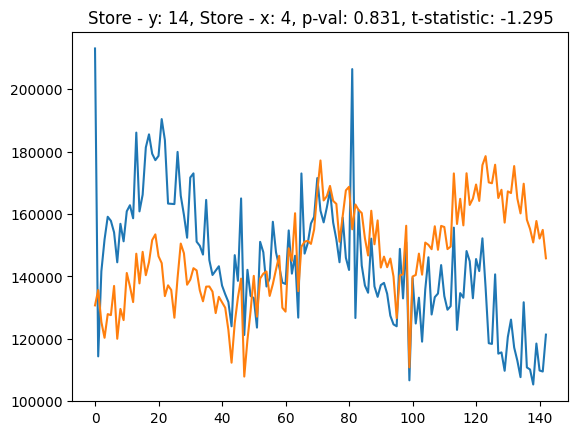

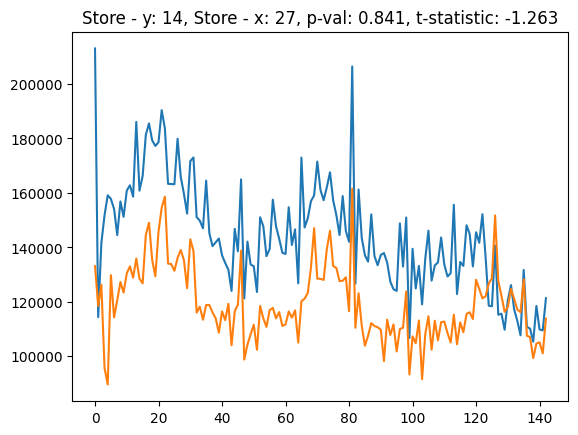

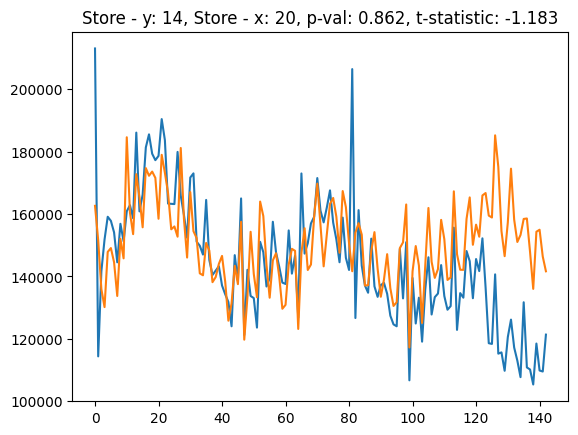

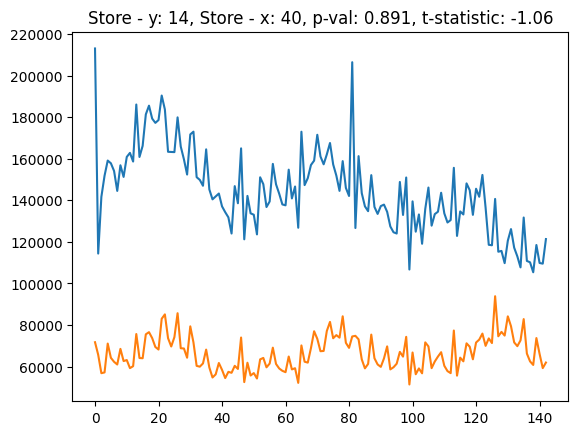

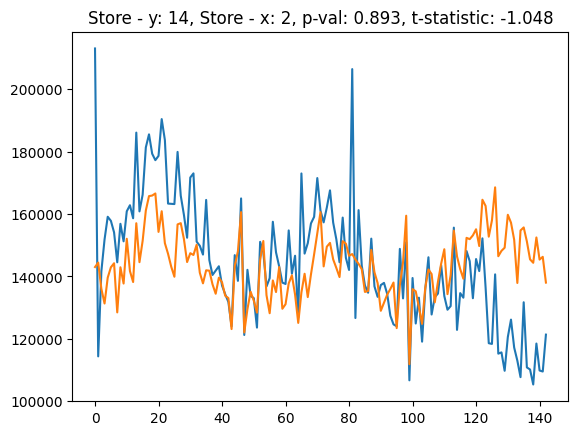

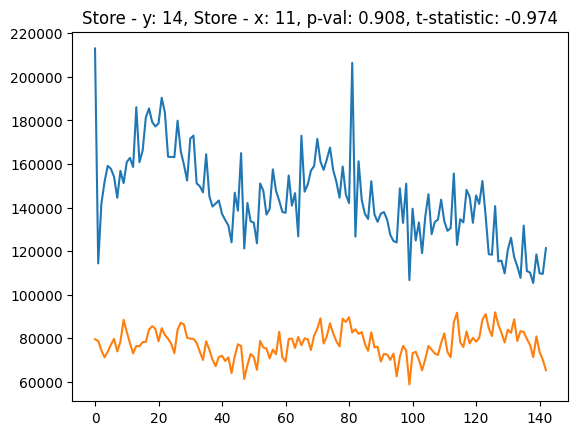

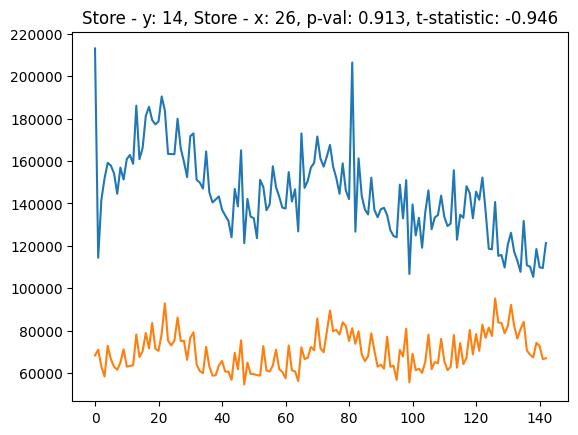

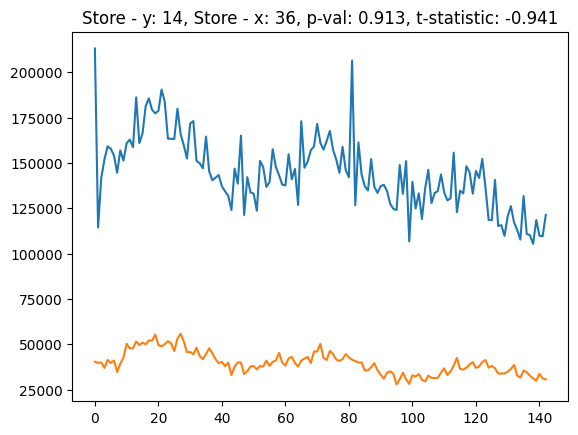

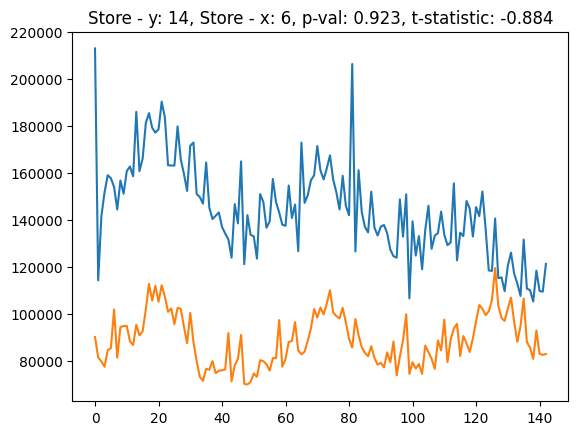

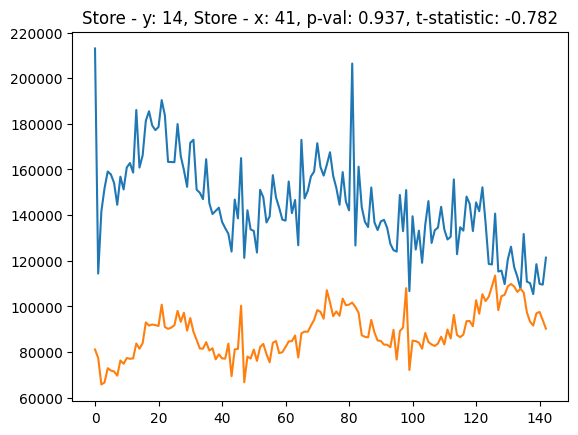

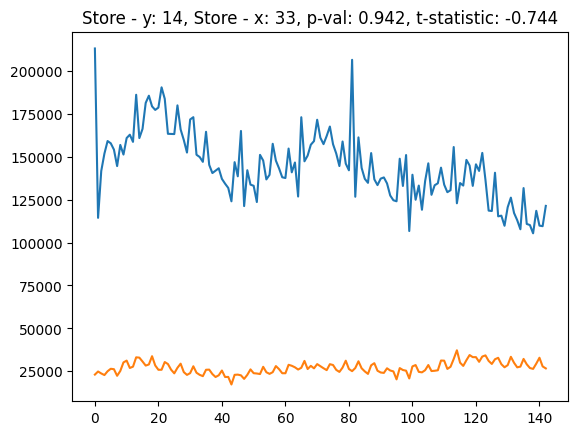

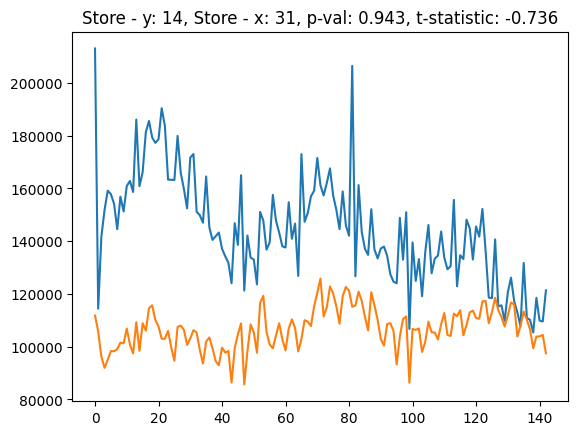

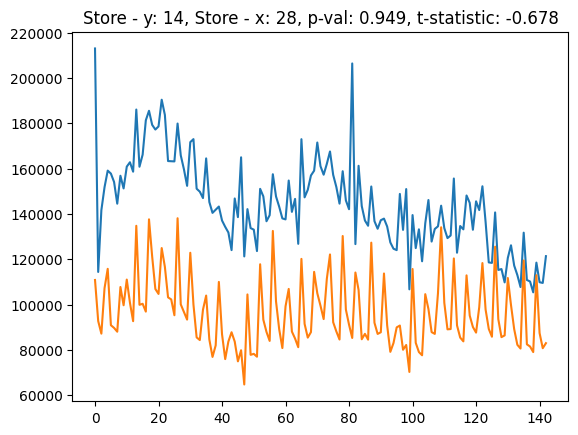

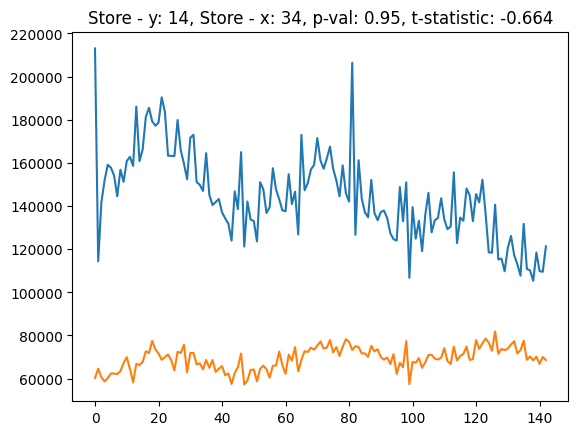

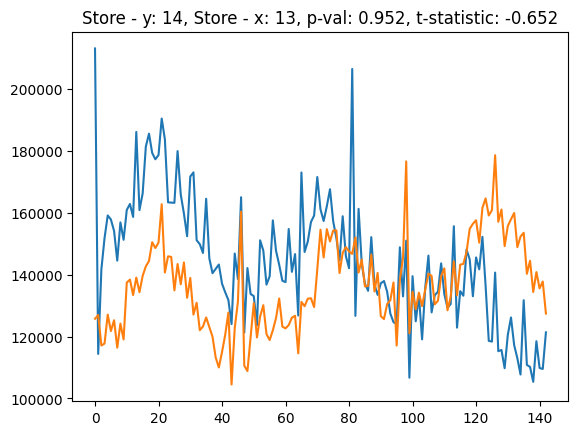

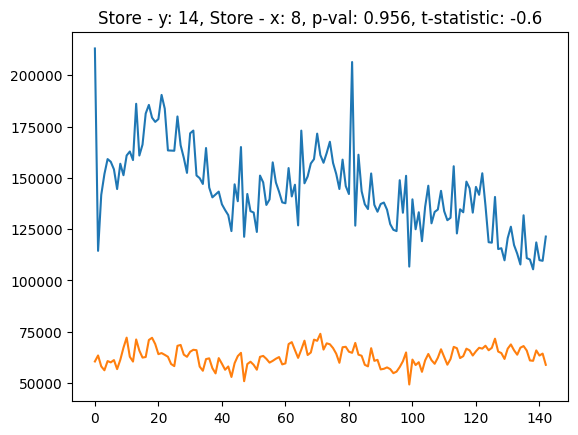

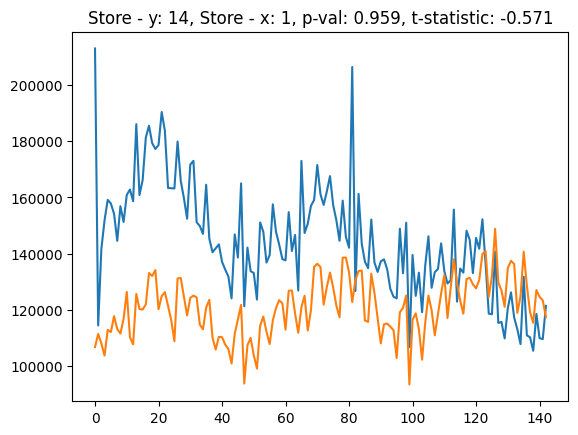

In [18]:
plot_pairs_coint(train_df, coint_results, dept=dept, store_type=store_type)